In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
# import data
residential_data_path = './data/10401_10811_residential_burglary.csv'
residential_data = pd.read_csv(residential_data_path, engine='python')

In [2]:
residential_data.head()

,編號,案類,發生(現)日期,發生時段,發生(現)地點
0,1,住宅竊盜,1040101,00~02,台北市文山區萬美里萬寧街1~30號
1,2,住宅竊盜,1040101,00~02,台北市信義區富台里忠孝東路5段295巷6弄1~30號
2,3,住宅竊盜,1040101,06~08,台北市中山區新生北路1段91~120號
3,4,住宅竊盜,1040101,10~12,台北市文山區明興里興隆路4段1~30號
4,5,住宅竊盜,1040101,12~14,台北縣新莊市思源路332巷1~30號


In [3]:
residential_data = residential_data.rename(columns={'編號': 'No', '發生(現)日期': 'date', '案類': 'type',\
                                                    '發生時段': 'time', '發生(現)地點': 'location'})
residential_data['location']

0                 台北市文山區萬美里萬寧街1~30號
1        台北市信義區富台里忠孝東路5段295巷6弄1~30號
2               台北市中山區新生北路1段91~120號
3               台北市文山區明興里興隆路4段1~30號
4                台北縣新莊市思源路332巷1~30號
                   ...             
3020          台北市信義區中興里光復南路541~570號
3021    台北市文山區華興里020鄰木柵路1段238巷1~30號
3022              台北市中山區樂群二路91~120號
3023      台北市文山區萬興里028鄰新光路1段91~120號
3024      台北市大安區昌隆里忠孝東路3段217巷2弄4-6號
Name: location, Length: 3025, dtype: object

In [4]:
residential_data['city'] = residential_data.location.str[:3]
residential_data['area'] = residential_data.location.str[3:6]
residential_data.head()

,No,type,date,time,location,city,area
0,1,住宅竊盜,1040101,00~02,台北市文山區萬美里萬寧街1~30號,台北市,文山區
1,2,住宅竊盜,1040101,00~02,台北市信義區富台里忠孝東路5段295巷6弄1~30號,台北市,信義區
2,3,住宅竊盜,1040101,06~08,台北市中山區新生北路1段91~120號,台北市,中山區
3,4,住宅竊盜,1040101,10~12,台北市文山區明興里興隆路4段1~30號,台北市,文山區
4,5,住宅竊盜,1040101,12~14,台北縣新莊市思源路332巷1~30號,台北縣,新莊市


In [5]:
# Check all kinds of city 
np.unique([residential_data.city])

array(['三民一', '中元路', '中興路', '仁孝路', '六路里', '南投縣', '南斗路', '台中市', '台北市',
       '台北縣', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '建國路', '彰化縣', '新竹市', '新竹縣',
       '東山路', '桃園縣', '澎湖縣', '自立路', '苗栗縣', '雲林縣', '高雄市', '龍肚路'],
      dtype=object)

In [6]:
# 去除台北市以外的
filtered_data = residential_data[(residential_data.city == '台北市')]
filtered_data.head()

,No,type,date,time,location,city,area
0,1,住宅竊盜,1040101,00~02,台北市文山區萬美里萬寧街1~30號,台北市,文山區
1,2,住宅竊盜,1040101,00~02,台北市信義區富台里忠孝東路5段295巷6弄1~30號,台北市,信義區
2,3,住宅竊盜,1040101,06~08,台北市中山區新生北路1段91~120號,台北市,中山區
3,4,住宅竊盜,1040101,10~12,台北市文山區明興里興隆路4段1~30號,台北市,文山區
5,6,住宅竊盜,1040102,00~02,台北市士林區天福里1鄰忠誠路2段130巷1~30號,台北市,士林區


In [7]:
# 檢查是否有遺漏
print(np.unique([filtered_data.city]))
print("共有", len(filtered_data), "筆")


['台北市']
共有 2763 筆


In [8]:
# # 地址轉換成經緯度
# import time
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys

# for loc in filtered_data.location:
#     url = 'https://tools.wingzero.tw/archive/get-geometry/tw'
#     driver = webdriver.Chrome('./crawler_drive/chromedriver')
#     driver.get(url)

#     input_form = driver.find_element_by_id("address")
#     input_form.send_keys(loc)
#     btn = driver.find_element_by_id("getGeo").click()
#     time.sleep(0.5)
#     lng = driver.find_element_by_id("lng").get_attribute('value')
#     lat = driver.find_element_by_id("lat").get_attribute('value')

#     print(loc, lng, lat)
#     driver.close()


In [9]:
from pylab import *
import pandas as pd

import geopandas as gpd
from matplotlib import pylab
from shapely.geometry import Point

pylab.rcParams['figure.figsize'] = (30.0, 30.0)

town_shp = gpd.read_file('./mapdata/TOWN_MOI_1081121.shp', encoding='utf8')
town_shp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


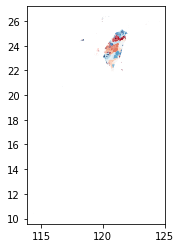

In [10]:
town_shp.plot(cmap='RdBu')

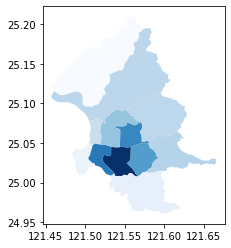

In [11]:
Taipei_shp = town_shp[town_shp['COUNTYNAME']=='臺北市']
land_value = [76.99, 45.61, 62.47, 44.74, 67.41, 53.05, 65.56, 50.61, 56.31, 52.31, 52.44, 42.71]
np.array(land_value)
Taipei_shp['land_value'] = np.array(land_value)
Taipei_shp.plot(cmap=plt.cm.Blues, column='land_value')

In [12]:
res_data = pd.read_csv('./data/new_residential_burglary3.csv', encoding='big5')
res_data["Coordinates"] = list(zip(res_data.經度, res_data.緯度))
res_data["Coordinates"] = res_data["Coordinates"].apply(Point)
res_data = res_data.dropna()
gdf = gpd.GeoDataFrame(res_data, geometry="Coordinates")
# gdf
res_data

,地址,經度,緯度,Coordinates
0,台北市文山區萬美里萬寧街1~30號,121.570149,25.004236,POINT (121.57015 25.00424)
2,台北市信義區富台里忠孝東路5段295巷6弄1~30號,121.572558,25.042038,POINT (121.57256 25.04204)
4,台北市中山區新生北路1段91~120號,121.532398,25.046331,POINT (121.53240 25.04633)
6,台北市文山區明興里興隆路4段1~30號,121.560075,24.989318,POINT (121.56007 24.98932)
8,台北市士林區天福里1鄰忠誠路2段130巷1~30號,121.531861,25.114088,POINT (121.53186 25.11409)
...,...,...,...,...
526,台北市中山區中山北路1段91~120號,121.522992,25.056177,POINT (121.52299 25.05618)
528,台北市萬華區萬大路322巷55弄1~30號,121.498422,25.024499,POINT (121.49842 25.02450)
530,台北市北投區開明里珠海路107巷1~30號,121.504817,25.141253,POINT (121.50482 25.14125)
532,台北市中正區文祥里金山南路一段91~120號,121.528076,25.036704,POINT (121.52808 25.03670)


In [13]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = Taipei_shp.to_json())

In [14]:
##!!##
p = figure(title = '臺北市地價著色地圖, 2019', 
           
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
palette = brewer['Blues'][8]
color_mapper = LinearColorMapper(palette = palette, low = 80, high = 40)
# Add patch renderer to figure.
city_source = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'land_value',
                                'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)


p.circle(res_data["經度"], res_data["緯度"], 
         fill_color = { 'transform' : color_mapper})

# Create hover tool
p.add_tools(HoverTool(renderers = [city_source],
                      tooltips = [('City','@TOWNNAME'),
                                ('地價','@land_value')]))
show(p)